# **Exercise 1:**
Answering the quiz that which is available in canvas

# **Exercise 2:**

Installing the required libaries:

        !pip install pandas
        !pip install numpy
        !pip install matplotlib
        !pip install scikit-learn

# **Exercise 3:**
The first step of any Machine learning project is to determine a problem to solve
and find a relevant dataset that can be used to train the model. In this example let us use the
dataset we presented in the lecture i.e., the breast cancer classification;


# **Exercise 4:**
Initally we need to import the relevant libaries, as follow:

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


We are using the dataset of brest cancer, which is available on kaggle as well

In [ ]:
# Use the dataset from their sklearn libarary
from sklearn.datasets import load_breast_cancer

# **Exercise 5:**
Load the dataset, we can easliy do the following:

In [ ]:
# Loading the breast cancer dataset
data = load_breast_cancer()
x = data.data
y = data.target
feature_names = data.feature_names
target_name = data.target_names

# **Exercise 6:**
Now we can start analysing the datset, to get a better understanding of it. Initially we can assess the classes distrubtion as follow:

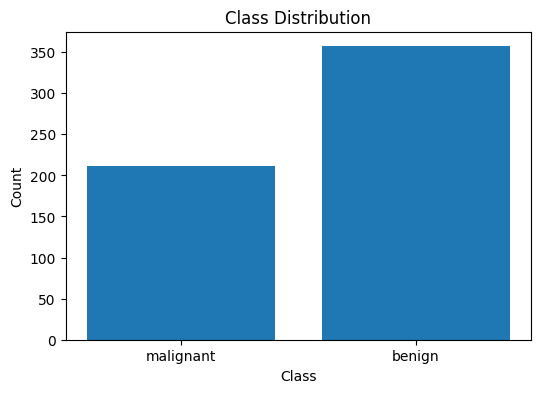

In [ ]:
# Visualizing the classes distribution
plt.figure(figsize=(6, 4))
plt.bar(target_names, np.bincount(y))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# **Exercise 7:**
To train a model that we can use in real world we need to ensure that it is aable to classify correctly, thus it has learned the correct patters to able to classify correctly. This we need to test it on a part of the data that it did not see in its training, i.e., the test set, and we can do it as follows:

In [ ]:
# Spilitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# **Exercise 8:**
To make sure that model is abole to use the features without any baise we need to scale that data as follow

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Exercise 9:
so far, we imported the data, and analyzed it and did a aimple scaling of the featuress. Consequently, now we can train the model on the training data as follow:

In [ ]:
# Fitting logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

# **Exercise 10:**
Since now we have trained model, we can use it to predict the classes of the test data as follow:

In [ ]:
# Predicting the test set results
y_pred = classifier.predict(X_test)


# **Exercise 11:**
To asse the performance of the classifier we can use the accuracy and other confusion matrix as follow:

In [ ]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]


# **Exercise 12:**
We can visualise the matrix as the following:


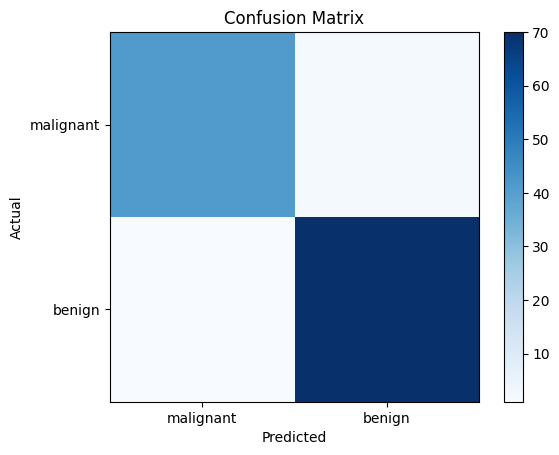

In [ ]:
# Plotting the confusion matrix

# Compute the confusion matrix from the true labels (y_test) and predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as an image with color intensity
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Set the title of the plot
plt.title('Confusion Matrix')

# Add a color bar to the side of the plot to show the intensity scale
plt.colorbar()

# Define the tick marks based on the number of classes (2 in this case for binary classification)
tick_marks = np.arange(2)

# Set the x-axis tick marks and labels to the class names (target_names)
plt.xticks(tick_marks, target_names)

# Set the y-axis tick marks and labels to the class names (target_names)
plt.yticks(tick_marks, target_names)

# Label the x-axis as 'Predicted'
plt.xlabel('Predicted')

# Label the y-axis as 'Actual'
plt.ylabel('Actual')

# Display the plot
plt.show()


# **Exercise 13:**
We can also plot the ROC (Receiver Operating Characteristic) curve using:

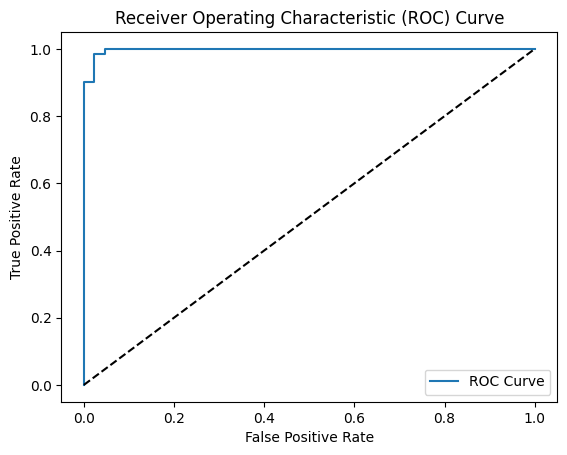

In [ ]:
# Plotting the ROC curve

# Calculate the predicted probabilities for the positive class (class 1) from the classifier
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve by plotting tpr against fpr
plt.plot(fpr, tpr, label='ROC Curve')

# Plot a diagonal line from (0, 0) to (1, 1) to represent random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate')

# Set the title of the plot as 'Receiver Operating Characteristic (ROC) Curve'
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add a legend to the plot, located in the lower right corner
plt.legend(loc='lower right')

# Display the plot
plt.show()


# **Exericse 14:**
In real-world scenarios, it is crucial to identify the most important features using classifiers. This information can be shared with medical experts, potentially leading to new discoveries and a better understanding of the science. We can visualize feature importance as follows:

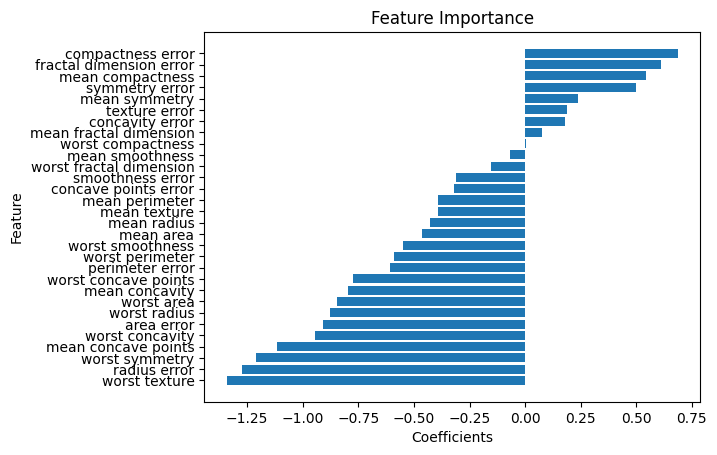

In [ ]:
# Plotting feature importance

# Extract the coefficients of the features from the classifier
coefficients = classifier.coef_[0]

# Get the indices that would sort the coefficients array
sorted_indices = np.argsort(coefficients)

# Create a horizontal bar plot of the coefficients, sorted by their importance
plt.barh(range(len(coefficients)), coefficients[sorted_indices], tick_label=feature_names[sorted_indices])

# Set the title of the plot to 'Feature Importance'
plt.title('Feature Importance')

# Label the x-axis as 'Coefficients'
plt.xlabel('Coefficients')

# Label the y-axis as 'Feature'
plt.ylabel('Feature')

# Display the plot
plt.show()


# **Exercise 15:**
Use different classification algorithms such as SVM and Decision Trees and compare the performance:


Importing libaries





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


Loading the Dataset:

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names


Splitting the Dataset

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training and Evaluating SVM

In [ ]:
# Training SVM
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred_svm = svm_classifier.predict(X_test)

# Evaluating the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.9824561403508771

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


SVM Confusion Matrix:
 [[41  2]
 [ 0 71]]


Training and Evaluating Decision Tree

In [ ]:
# Training Decision Tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred_tree = tree_classifier.predict(X_test)

# Evaluating the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9385964912280702

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Decision Tree Confusion Matrix:
 [[39  4]
 [ 3 68]]


# **Exercise 16:**
Trying a Different Dataset (Iris Dataset)

Loadint the Iris Dataset

In [ ]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target


Spliting the Dataset

In [ ]:
# Split the dataset into training and testing sets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)


Feature Scaling

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_iris_train = scaler.fit_transform(X_iris_train)
X_iris_test = scaler.transform(X_iris_test)


Training and Evaluating SVM on Iris Dataset

In [ ]:
# Training SVM
svm_classifier_iris = SVC(probability=True)
svm_classifier_iris.fit(X_iris_train, y_iris_train)

# Predicting the test set results
y_iris_pred_svm = svm_classifier_iris.predict(X_iris_test)

# Evaluating the SVM model
print("Iris SVM Accuracy:", accuracy_score(y_iris_test, y_iris_pred_svm))
print("\nIris SVM Classification Report:\n", classification_report(y_iris_test, y_iris_pred_svm))
print("\nIris SVM Confusion Matrix:\n", confusion_matrix(y_iris_test, y_iris_pred_svm))


Iris SVM Accuracy: 1.0

Iris SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Iris SVM Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Training and Evaluating Decision Tree on Iris Dataset

In [ ]:
# Training Decision Tree
tree_classifier_iris = DecisionTreeClassifier()
tree_classifier_iris.fit(X_iris_train, y_iris_train)

# Predicting the test set results
y_iris_pred_tree = tree_classifier_iris.predict(X_iris_test)

# Evaluating the Decision Tree model
print("Iris Decision Tree Accuracy:", accuracy_score(y_iris_test, y_iris_pred_tree))
print("\nIris Decision Tree Classification Report:\n", classification_report(y_iris_test, y_iris_pred_tree))
print("\nIris Decision Tree Confusion Matrix:\n", confusion_matrix(y_iris_test, y_iris_pred_tree))


Iris Decision Tree Accuracy: 1.0

Iris Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Iris Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# **Exercise 17**
Find Any Dataset for Classification and Test Algorithms

Finding and Loading a New Dataset
For this exercise, let's use the Wine dataset from the UCI Machine Learning Repository.

In [ ]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target


Splitting the Dataset

In [ ]:
# Split the dataset into training and testing sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)


Feature Scaling

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_wine_train = scaler.fit_transform(X_wine_train)
X_wine_test = scaler.transform(X_wine_test)


Training and Evaluating SVM on Wine Dataset

In [ ]:
# Training SVM
svm_classifier_wine = SVC(probability=True)
svm_classifier_wine.fit(X_wine_train, y_wine_train)

# Predicting the test set results
y_wine_pred_svm = svm_classifier_wine.predict(X_wine_test)

# Evaluating the SVM model
print("Wine SVM Accuracy:", accuracy_score(y_wine_test, y_wine_pred_svm))
print("\nWine SVM Classification Report:\n", classification_report(y_wine_test, y_wine_pred_svm))
print("\nWine SVM Confusion Matrix:\n", confusion_matrix(y_wine_test, y_wine_pred_svm))


Wine SVM Accuracy: 1.0

Wine SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Wine SVM Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


Training and Evaluating Decision Tree on Wine Dataset

In [ ]:
# Training Decision Tree
tree_classifier_wine = DecisionTreeClassifier()
tree_classifier_wine.fit(X_wine_train, y_wine_train)

# Predicting the test set results
y_wine_pred_tree = tree_classifier_wine.predict(X_wine_test)

# Evaluating the Decision Tree model
print("Wine Decision Tree Accuracy:", accuracy_score(y_wine_test, y_wine_pred_tree))
print("\nWine Decision Tree Classification Report:\n", classification_report(y_wine_test, y_wine_pred_tree))
print("\nWine Decision Tree Confusion Matrix:\n", confusion_matrix(y_wine_test, y_wine_pred_tree))


Wine Decision Tree Accuracy: 0.9444444444444444

Wine Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Wine Decision Tree Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
